In [1]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [3]:
def embed(texts):
    return model(texts)

In [4]:
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549279,  0.02886906, -0.02628897,  0.04502158, -0.01233335,
         0.02568329, -0.00071882, -0.05447304,  0.04221928, -0.0191371 ,
         0.02710011, -0.04328045, -0.02486858,  0.0135952 ,  0.00482793,
        -0.05379638,  0.01630707,  0.02139907,  0.02644024, -0.02320251,
         0.06569218, -0.10137626, -0.01691998,  0.02492482,  0.02406815,
        -0.03139618, -0.03265484, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868447,  0.04380691, -0.02071748, -0.01873296, -0.03071439,
         0.01825575,  0.03627162,  0.01321464,  0.0094349 , -0.03006625,
         0.06655685,  0.01529936, -0.10101432, -0.00671943, -0.01578641,
         0.04991001,  0.02548564,  0.05454975, -0.01658573,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997448,
         0.04206816, -0.04119828, -0.00768586, -0.05101158,  0.01210047,
        -0.01673209, -0.01382073,  0.00373702,  0.04911597, -0.03481682,
 

In [9]:
df = pd.read_csv('Top_10000_Movies.csv',engine="python")
df

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,9995,530.0,en,A Grand Day Out,9.266,1990-05-18,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,NaN
10010,9996,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
10011,9997,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
10012,9998,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


In [10]:
df = df[["original_title", "overview"]]
df.head()

,original_title,overview
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...
1,Eternals,The Eternals are a team of ancient aliens who ...
2,Dune,"Paul Atreides, a brilliant and gifted young ma..."
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...
4,Free Guy,A bank teller called Guy realizes he is a back...


In [11]:
df = df.dropna()
df = df.reset_index()
df = df[:5000]

In [12]:
titles = list(df['overview'])

In [13]:
titles[:10]

['After finding a host body in investigative reporter Eddie Brock, the alien symbiote must face a new enemy, Carnage, the alter ego of serial killer Cletus Kasady.',
 'The Eternals are a team of ancient aliens who have been living on Earth in secret for thousands of years. When an unexpected tragedy forces them out of the shadows, they are forced to reunite against mankind’s most ancient enemy, the Deviants.',
 "Paul Atreides, a brilliant and gifted young man born into a great destiny beyond his understanding, must travel to the most dangerous planet in the universe to ensure the future of his family and his people. As malevolent forces explode into conflict over the planet's exclusive supply of the most precious resource in existence-a commodity capable of unlocking humanity's greatest potential-only those who can conquer their fear will survive.",
 'A mysterious woman recruits bank teller Ludwig Dieter to lead a group of aspiring thieves on a top-secret heist during the early stages 

In [14]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (5000, 512)


In [15]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

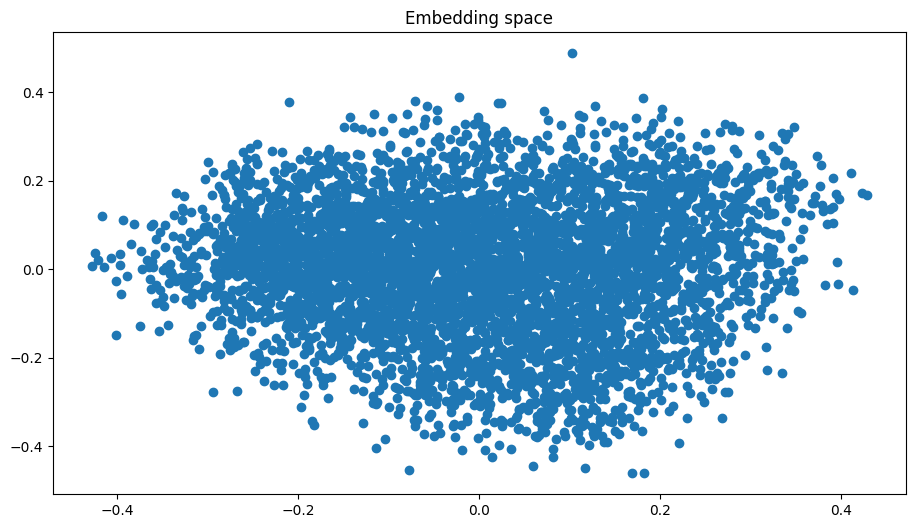

In [16]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [17]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [1]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['original_title'].iloc[neighbors].tolist()

In [19]:
print('Recommended Movies:')
recommend("harry potter")

Recommended Movies:


['Harry Potter and the Deathly Hallows: Part 2',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Goblet of Fire',
 'Fantastic Beasts: The Crimes of Grindelwald',
 "Harry Potter and the Philosopher's Stone",
 '50 Greatest Harry Potter Moments']